# Proyek Analisis Data: Bike Sharing Dataset
- Nama:ERIKA BUDIARTI
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Bagaimana jam, hari kerja, hari libur dan bulan mempengaruhi permintaan sewa sepeda?
- pertanyaan 2 : Bagaimana cuaca, suhu, kelembaban udara dan musim mempengaruhi permintaan sewa sepeda?

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px --- pakai di VSCode


## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Attribute Information (source: http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index

dteday : date

season : season (1:spring, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from [Web Link])

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy |
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist |
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

for further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### Assessing Data

##### Table : day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Checking Missing Value**

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Checking Duplicated Data**

In [6]:
day_df.duplicated().sum()

0

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Table : hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Checking Missing Value**

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Checking Duplicated Data**

In [10]:
hour_df.duplicated().sum()

0

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

**Change the data type of "dteday" column from object to datetime**

In [12]:
datetime_columns = ['dteday']

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column]).dt.date
  hour_df[column] = pd.to_datetime(hour_df[column]).dt.date


**We don't need to drop or impute Missing Value and Duplicated Data**

**because both dataset have no Missing Value and Duplicated Data**

## Exploratory Data Analysis (EDA)

### Explore day_df

In [13]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
719,720,2012-12-20,4,1,12,0,4,1,2,0.330000,0.335217,0.667917,0.132463,314,3814,4128
385,386,2012-01-21,1,1,1,0,6,0,2,0.173333,0.174875,0.831250,0.222642,67,1234,1301
319,320,2011-11-16,4,0,11,0,3,1,3,0.456667,0.451988,0.930000,0.136829,145,1672,1817
30,31,2011-01-31,1,0,1,0,1,1,2,0.180833,0.186250,0.603750,0.187192,42,1459,1501


In [14]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Explore hour_df

In [15]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1421,1422,2011-03-04,1,0,3,12,0,5,1,1,0.32,0.3030,0.43,0.1642,10,87,97
5163,5164,2011-08-08,3,0,8,1,0,1,1,1,0.68,0.6364,0.83,0.1343,4,8,12
14000,14001,2012-08-11,3,1,8,13,0,6,0,1,0.80,0.7424,0.49,0.3582,228,341,569
3022,3023,2011-05-10,2,0,5,20,0,2,1,1,0.54,0.5152,0.60,0.1343,50,241,291
10746,10747,2012-03-28,2,1,3,21,0,3,1,1,0.58,0.5455,0.60,0.2537,28,233,261


In [16]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Merging dataset

In [27]:
bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="right"
)

#please run this code again, when you meet any error or runtime disconnected

In [18]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0
1,2,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,3,2011-01-01,1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2
3,4,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,3
4,5,2011-01-01,1,0,1,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [19]:
bike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
17374,17375,2012-12-31,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,19
17375,17376,2012-12-31,1,1,12,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,20
17376,17377,2012-12-31,1,1,12,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,21
17377,17378,2012-12-31,1,1,12,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,22
17378,17379,2012-12-31,1,1,12,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,23


In [20]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,11.546752
std,5017.0295,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,6.914405
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4345.5000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,6.000000
50%,8690.0000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,12.000000
75%,13034.5000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,18.000000
max,17379.0000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,23.000000


## Visualization & Explanatory Analysis

**Visualizing rental distribution based on seasons**

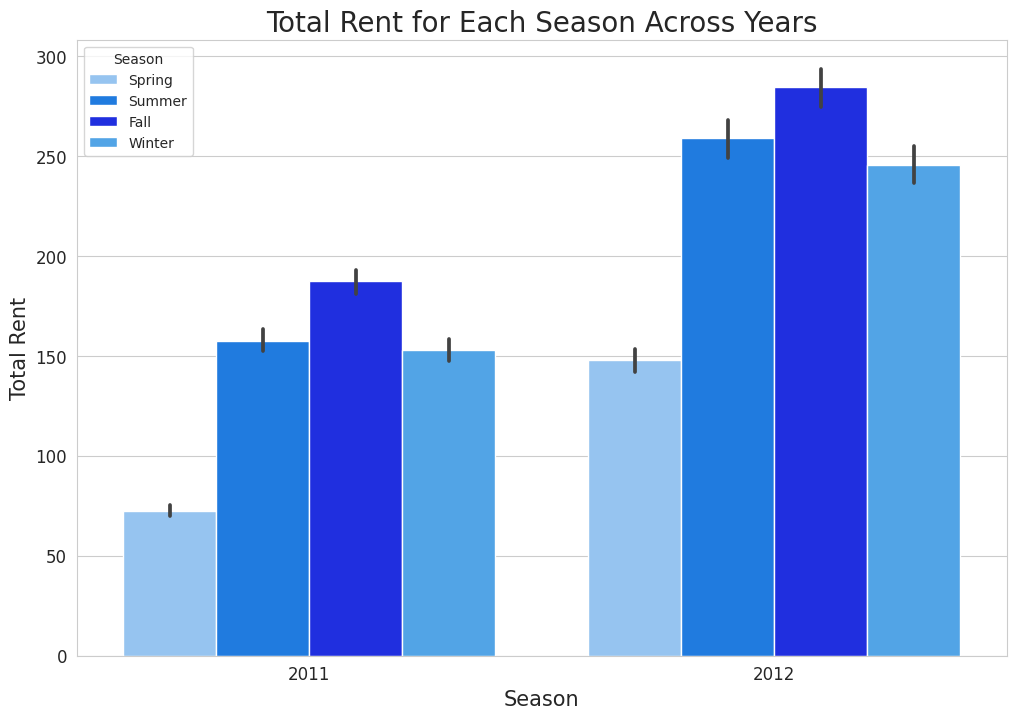

In [21]:
bike_df['season'] = bike_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike_df['yr'] = bike_df['yr'].map({0: '2011', 1: '2012'})

sns.set_style('whitegrid')

custom_palette = {'Spring': '#87C4FF',
                  'Summer': '#0079FF',
                  'Fall': '#0014FF',
                  'Winter' : '#39A7FF'}

plt.figure(figsize=(12, 8))
sns.barplot(x='yr',
            y='cnt',
            hue='season',
            data=bike_df,
            palette=custom_palette)

plt.title('Total Rent for Each Season Across Years', fontsize=20)
plt.xlabel('Season', fontsize=15)
plt.ylabel('Total Rent', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Season', loc='upper left')
plt.show()



---


Distribusi barplot di atas menggambarkan pola jumlah pengguna sepanjang musim. Jumlah pengguna **paling rendah** adalah selama ***musim Semi***, diikuti oleh peningkatan bertahap selama ***musim Panas***. Jumlah tersebut kemudian **mencapai puncak** pada awal ***musim Gugur*** dan kembali menurun pada ***musim Dingin***


---

**Pengaruh Musim**
1. Musim gugur sering kali terdapat berbagai event atau festival dan menampilkan pemandangan yang indah dengan daun-daun yang berubah warna. Ini dapat mendorong meningkatnya permintaan sewa sepeda selama musim gugur.
2. Musim semi adalah waktu di mana banyak orang memulai kembali kegiatan luar ruangan mereka setelah musim dingin. Namun, ini dapat mengurangi permintaan sewa sepeda, karena kondisi cuaca yang kurang stabil.








**Visualizing rental distribution based on weathers**

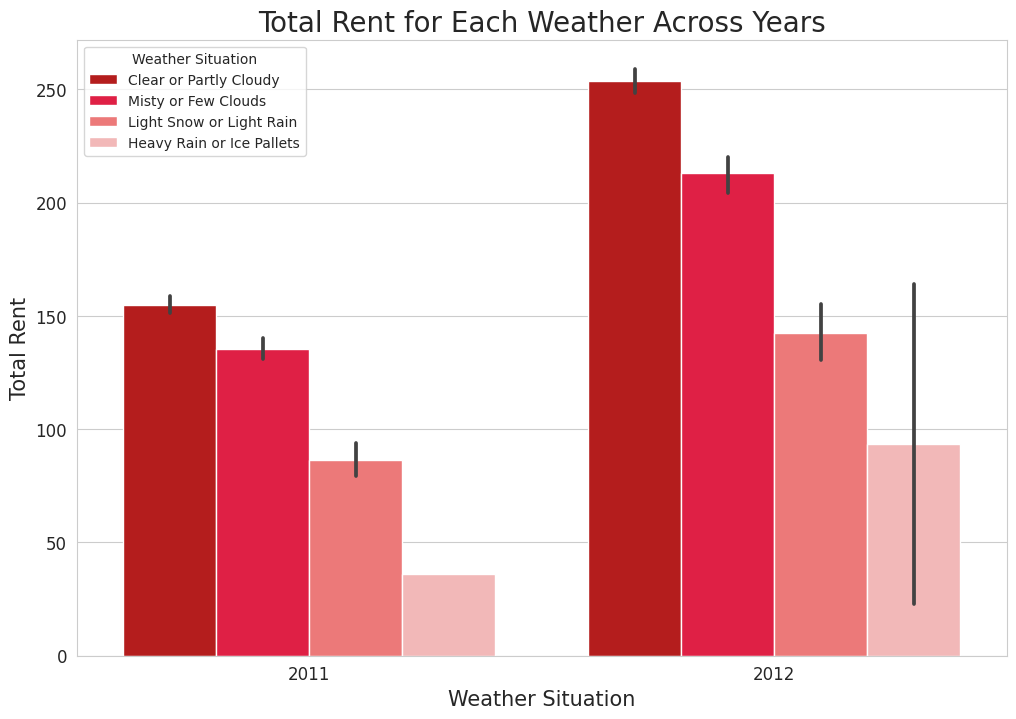

In [23]:
bike_df['weathersit'] = bike_df['weathersit'].map({1: 'Clear or Partly Cloudy', 2: 'Misty or Few Clouds', 3: 'Light Snow or Light Rain', 4: 'Heavy Rain or Ice Pallets'})
bike_df['yr'] = bike_df['yr'].map({0: '2011', 1: '2012'})

sns.set_style('whitegrid')

custom_palette = {'Clear or Partly Cloudy': '#CD0404',
                  'Misty or Few Clouds': '#FF0032',
                  'Light Snow or Light Rain': '#FF6666',
                  'Heavy Rain or Ice Pallets' : '#FCAEAE' }

plt.figure(figsize=(12, 8))
sns.barplot(x='yr',
            y='cnt',
            hue='weathersit',
            data=bike_df,
            palette=custom_palette)

plt.title('Total Rent for Each Weather Across Years', fontsize=20)
plt.xlabel('Weather Situation', fontsize=15)
plt.ylabel('Total Rent', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Weather Situation', loc='upper left')
plt.show()



---


Dari barplot di atas, dapat dilihat bahwa jumlah pengguna sepeda paling tinggi pada saat cuaca cerah (1) dan menyusul di bawahnya pada saat cuaca berawan (2). Sedangkan pada saat hujan dan salju ringan (3), jumlah pengguna berkurang. Saat badai hujan dan salju (4), jumlah pengguna menurun drastis.

---

**Pengaruh Cuaca**

1. Cuaca cerah memberikan kondisi yang ideal untuk bersepeda. Suhu yang nyaman, sinar matahari yang hangat, dan jalan yang kering membuat pengalaman bersepeda lebih menyenangkan, sehingga permintaan sewa sepeda menjadi lebih tinggi.
2. Bersepeda dalam badai salju dan hujan lebat bisa sangat tidak nyaman dan dingin. Selain itu, badai salju dan hujan lebat dapat mengurangi visibilitas untuk pengguna sepeda maupun pengemudi lainnya, sehingga permintaan sewa menjadi sangat rendah.

**Visualizing weekday counts**

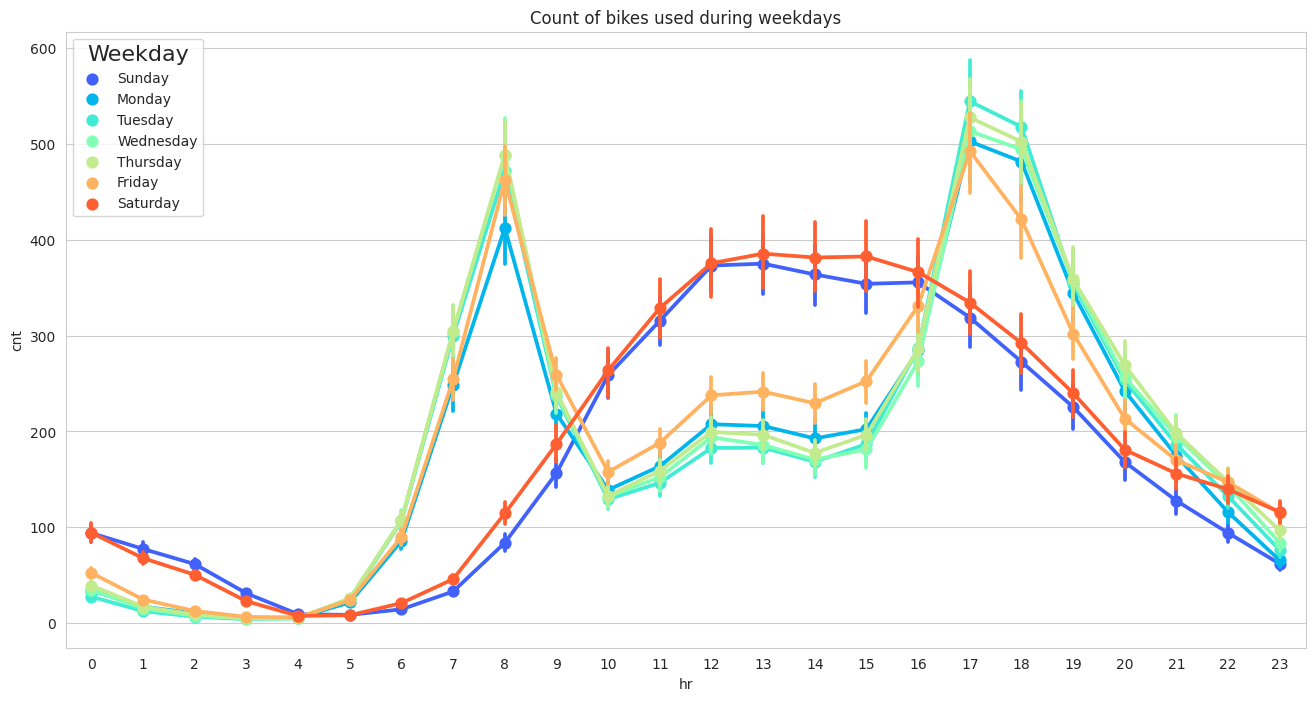

In [24]:
# Create a dictionary to map numeric weekday values to weekday names
weekday_labels = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
custom_cmap = 'rainbow'

fig, ax = plt.subplots(figsize=(16, 8))
sns.pointplot(data=bike_df[['hr', 'cnt', 'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              palette=custom_cmap)

ax.set(title='Count of bikes used during weekdays')

# Customize the legend
legend = ax.legend(title='Weekday', loc='upper left')
legend.set_title('Weekday', prop={'size': 16})

# Change the legend labels using the weekday_labels dictionary
for i, text in enumerate(legend.texts):
    text.set_text(weekday_labels[i])

plt.show()





---


Distribusi di atas menggambarkan pola pengguna sepeda pada hari-hari dalam seminggu. Terlihat bahwa pengguna meningkat pada weekend (0 dan 6) lebih tinggi pada pukul 9 sampai 16. Sedangkan pada weekday (1-5) lebih tinggi pada pukul 5 sampai 9 dan pukul 17 sampai 21.


---

**Pengaruh Jam (0 - 23) selama Hari Kerja dan Akhir Pekan**
1. Hari Kerja (Senin hingga Jumat):
Jam-jam puncak dari jam 5 pagi hingga 9 pagi, orang mungkin menyewa sepeda untuk berangkat ke tempat kerja atau sekolah, dan jam 17 (5 sore) hingga 21 (9 malam) mereka menggunakannya untuk pulang ke rumah.
2. Akhir Pekan (Sabtu dan Minggu):
Jam-jam puncak dari jam 9 pagi hingga 16 (4 sore) mungkin terkait dengan perjalanan sepeda rekreasi untuk menjelajahi taman, jalur, atau objek wisata, atau sekedar menikmati perjalanan santai selama jam-jam ini.

**Visualizing monthly counts**

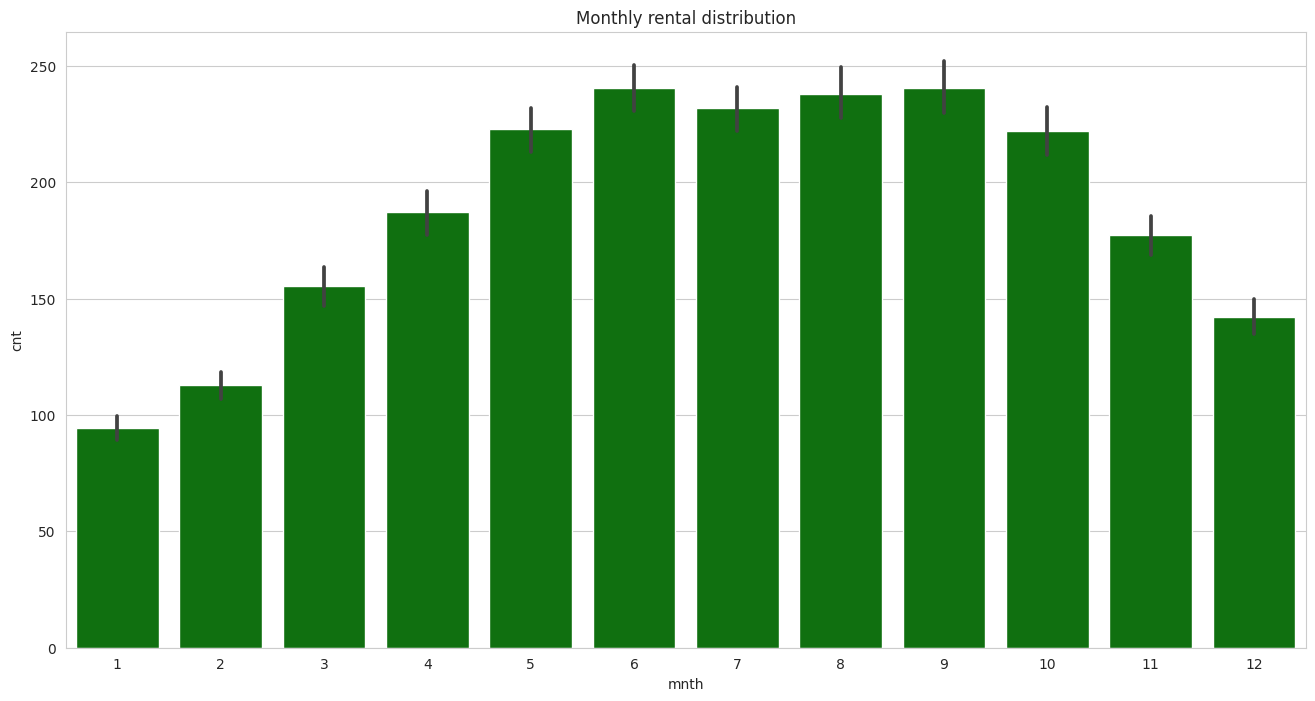

In [25]:
fig, ax = plt.subplots(figsize=(16, 8))

sns.barplot(data=bike_df[['mnth', 'cnt']],
            x='mnth',
            y='cnt',
            color = 'green')

ax.set(title='Monthly rental distribution')

plt.show()



---


Bar Plot di atas menampilkan jumlah pengguna stabil naik dari bulan Januari (1) sampai pada puncaknya di bulan Juni (6), kemudian stabil sampai bulan September (9) dan perlahan turun sampai bulan Desember (12)

---

**Pengaruh Bulan/Month**
1. Bulan Juni hingga September adalah musim panas di banyak negara, termasuk di Amerika Utara dan Eropa. Cuaca yang hangat sangat mendukung kegiatan luar ruangan, sehingga banyak orang merasa lebih nyaman dan termotivasi untuk bersepeda, baik untuk rekreasi maupun transportasi sehari-hari.
2. Pada bulan Desember sampai Februari, banyak negara mengalami musim dingin, dengan suhu yang lebih rendah bahkan bersalju. Kondisi ini mengurangi minat orang untuk bersepeda, yang mengakibatkan penurunan permintaan sewa sepeda


**Visualizing holiday vs workday counts**

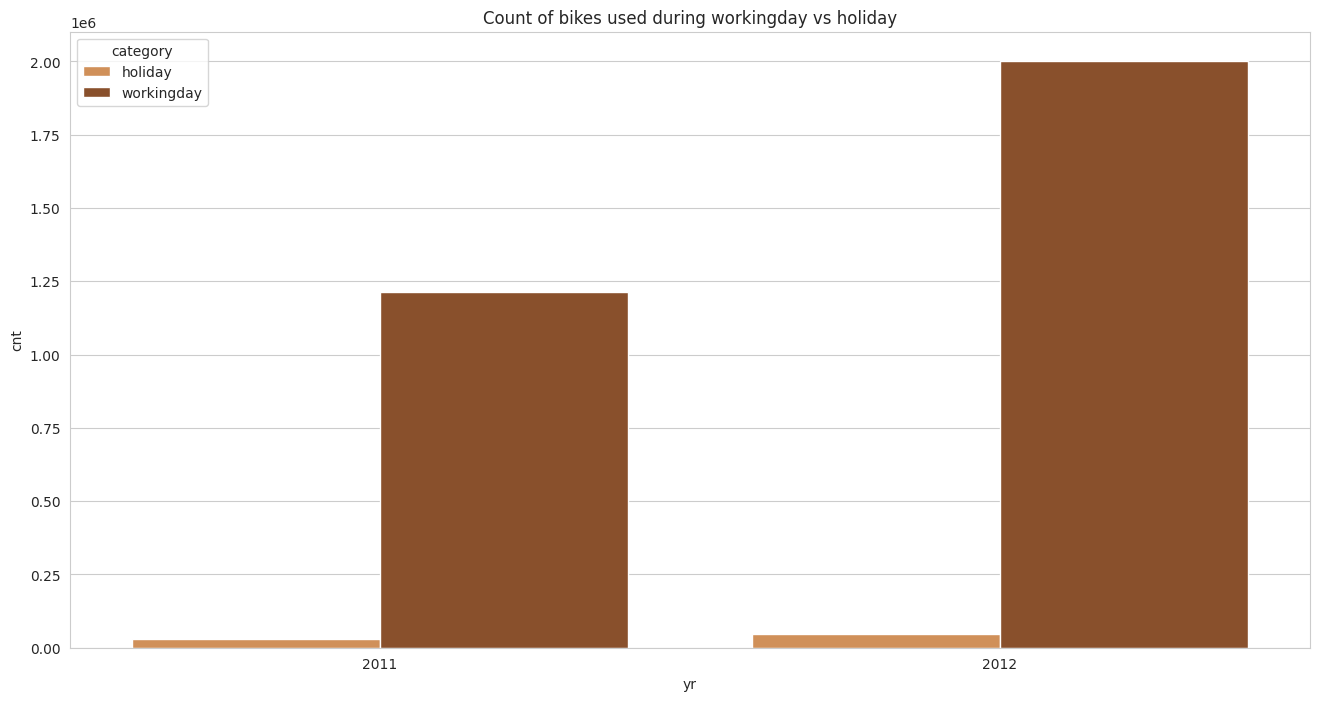

In [26]:
bike_df['category'] = bike_df['holiday'].apply(lambda x: 'holiday' if x else 'workingday')
bike_df = bike_df.groupby(['category','yr']).agg({
        'cnt': 'sum'
    }).reset_index()
custom_palette = {'holiday': '#E48F45', 'workingday': '#994D1C'}
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(16, 8))
sns.barplot(x='yr',
            y='cnt',
            hue='category',
            data=bike_df,
            palette=custom_palette)
ax.set(title='Count of bikes used during workingday vs holiday')
plt.show()

tahun 0 = 2021, tahun 1 = 2012

---



Dari barchart ini dapat dilihat bahwa ada perbedaaan yang sangat signifikan dari jumlah pengguna pada hari kerja dan hari libur.


---
**Pengaruh Hari Kerja vs Hari Libur**
1. Beberapa individu mungkin menyewa sepeda untuk kegiatan rekreasi selama hari libur, tetapi permintaan sewa seringkali lebih tinggi pada hari kerja ketika orang memiliki lebih banyak waktu untuk berpartisipasi dalam kegiatan rekreasi.
2. Penyedia layanan sewa sepeda mungkin memiliki jam operasional yang lebih terbatas pada hari-hari libur, hal itu mempengaruhi orang untuk menyewa sepeda pada hari kerja biasa ketika layanan lebih mudah diakses.



**Visualizing Year count**

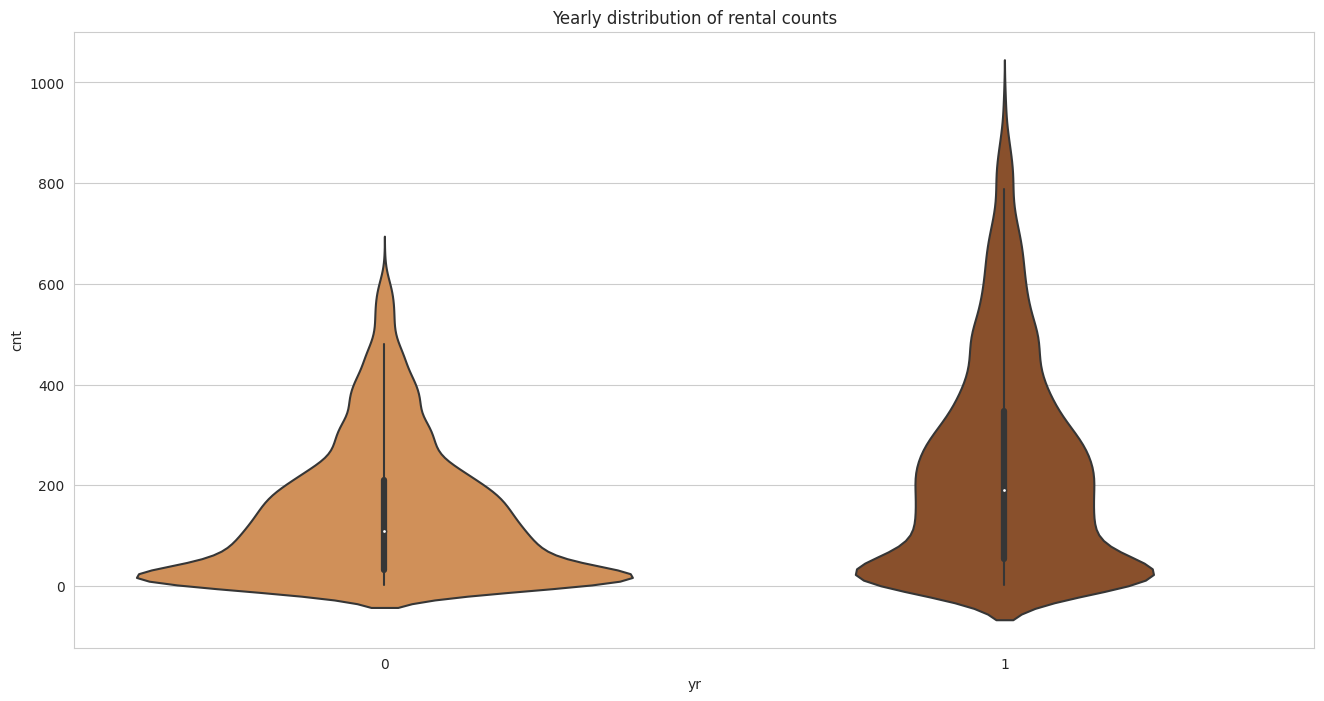

In [28]:
custom_colors = ['#E48F45', '#994D1C']

fig, ax = plt.subplots(figsize=(16, 8))
sns.violinplot(data=bike_df[['yr', 'cnt']],
               x='yr',
               y='cnt',
               palette=custom_colors)

ax.set(title='Yearly distribution of rental counts')
plt.show()

tahun 0 = 2011, tahun 1 = 2012


---



Distribusi violinplot dengan jelas membantu kita memahami distribusi dalam jumlah pengguna pada tahun 2011 dan 2012. Distribusi untuk tahun 2012 memiliki puncak pada nilai tertinggi dibandingkan dengan distribusi untuk tahun 2011.


---



**Plotting pairplot of the numeric variables**

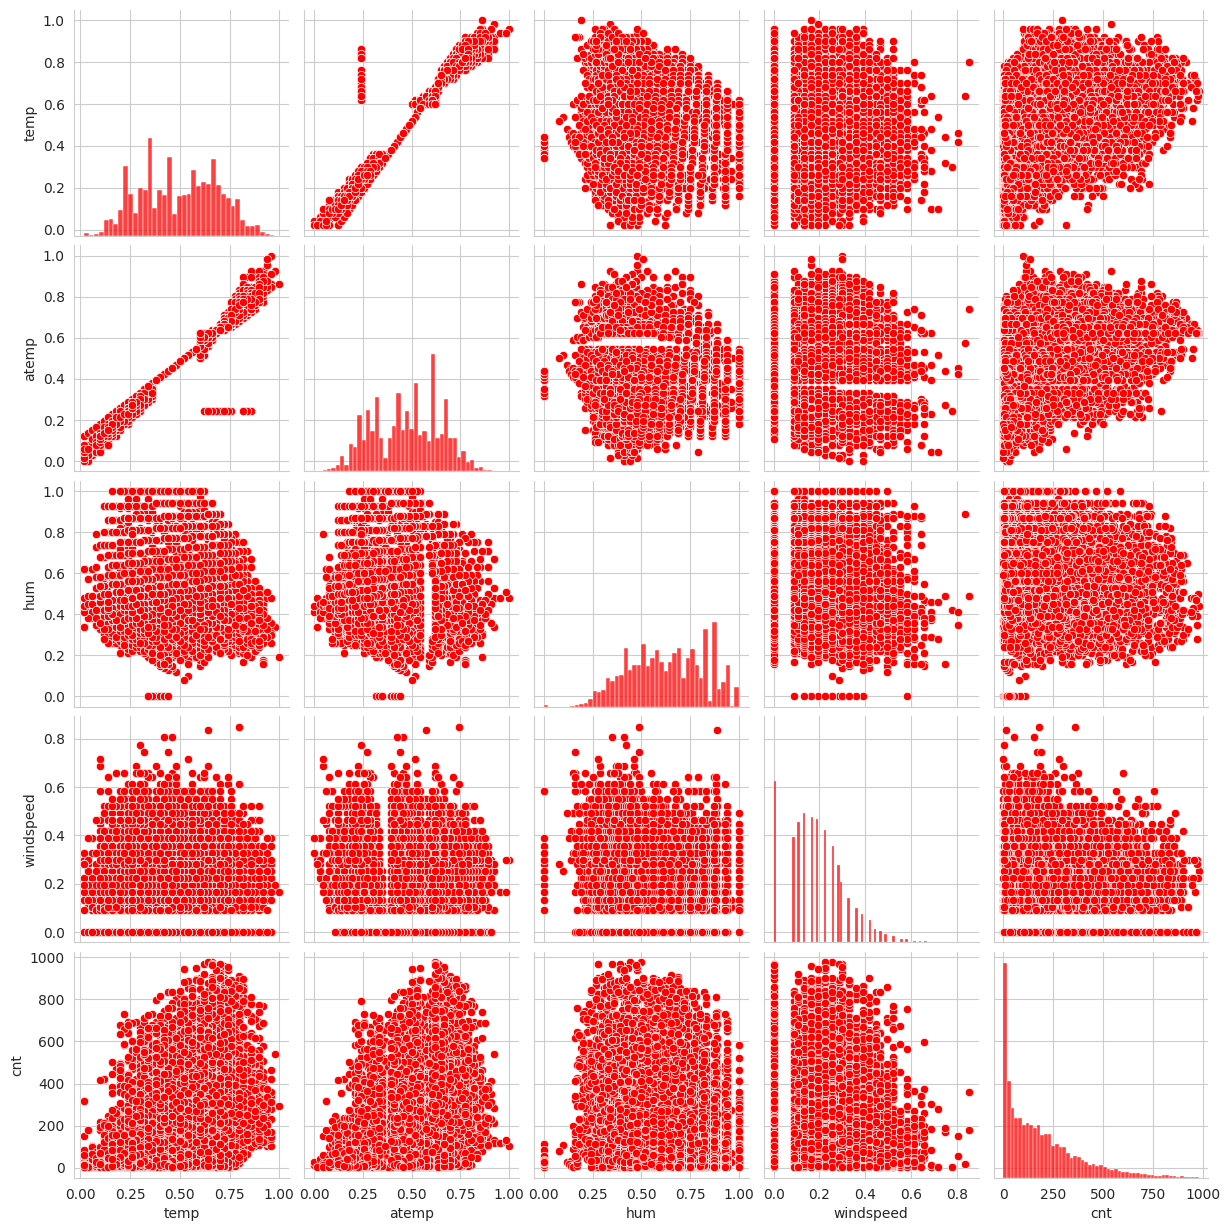

<Figure size 100x100 with 0 Axes>

In [29]:
data = bike_df[["temp","atemp","hum","windspeed","cnt"]]
sns.pairplot(data, diag_kws={'color': 'red'}, plot_kws={'color': 'red'})
plt.figure(figsize=(1, 1))
plt.show()



---


**Pengaruh Suhu dan Kelembaban Udara**

1. Saat suhu / temperatur sangat rendah, tubuh cenderung menjadi kaku dan tidak nyaman untuk beraktivitas, sehingga dapat mengurangi permintaan sewa sepeda.
2. Kelembaban udara yang tinggi membuat keringat sulit menguap dari kulit, sehingga orang merasa tidak nyaman, sehingga permintaan sewa pun menurun.


---



**Plotting correlation of all variables using heatmap**

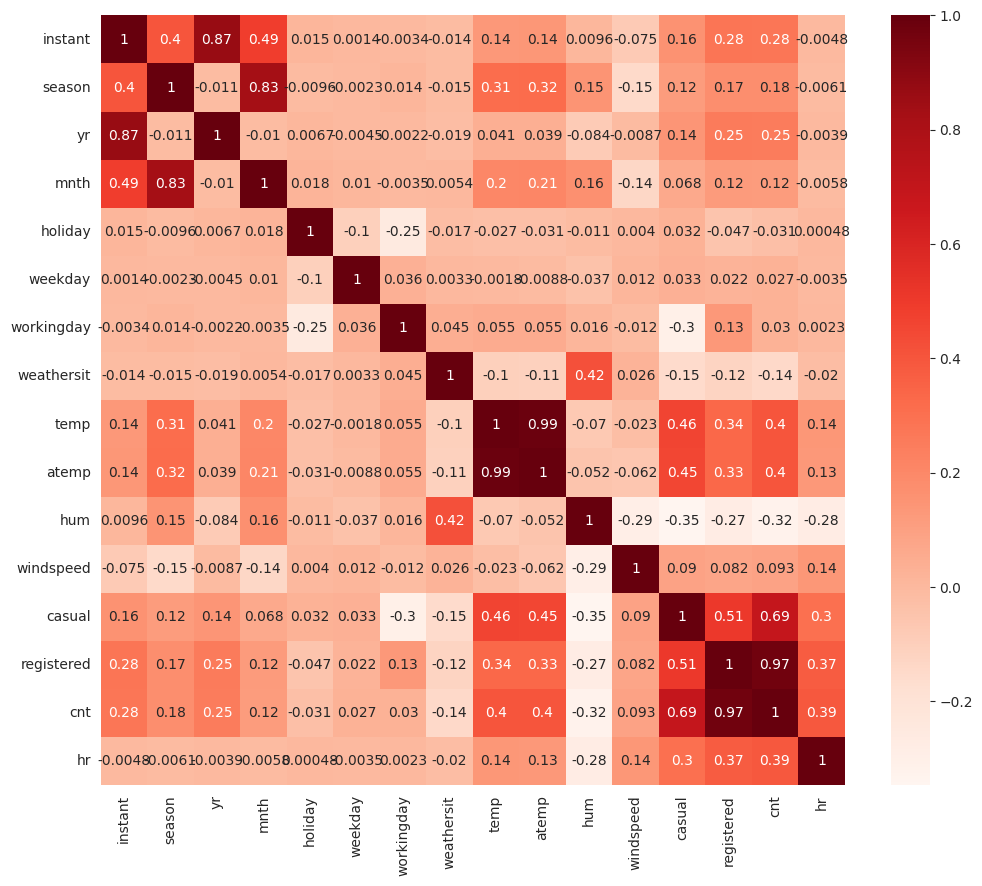

In [30]:
plt.figure(figsize = (12,10))
sns.heatmap(bike_df.corr(numeric_only=True),
            annot = True,
            cmap="Reds")
plt.show()



---


Dari Heatmap di atas, dapat diketahui bahwa

variable yang mempunyai korelasi positif tertinggi dengan jumlah permintaan sewa sepeda adalah "temp" dan "atemp" --- yang berarti semakin rendah temperatur, permintaan sewa akan semakin menurun.

variable yang mempunyai korelasi negatif tertinggi dengan jumlah permintaan sewa sepeda adalah "hum" --- yang berarti semakin tinggi kelembaban udara, semakin menurun permintaan sewa.



---



### RFM Analysis

In [31]:
day_change = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}
day_df["weekday"] = day_df["weekday"].map(day_change)


In [32]:
rfm_df = day_df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum"
})

rfm_df.columns = ["weekday", "max_order_timestamp", "frequency", "monetary"]


rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = pd.to_datetime(day_df["dteday"]).dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df = rfm_df[["weekday", "recency", "frequency", "monetary"]]

weekday_order = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']
rfm_df['weekday'] = pd.Categorical(rfm_df['weekday'], categories=weekday_order, ordered=True)
rfm_df = rfm_df.sort_values('weekday')
rfm_df.reset_index(drop=True, inplace=True)

rfm_df

,weekday,recency,frequency,monetary
0,sunday,1,105,444027
1,monday,0,105,455503
2,tuesday,6,104,469109
3,wednesday,5,104,473048
4,thursday,4,104,485395
5,friday,3,104,487790
6,saturday,2,105,477807


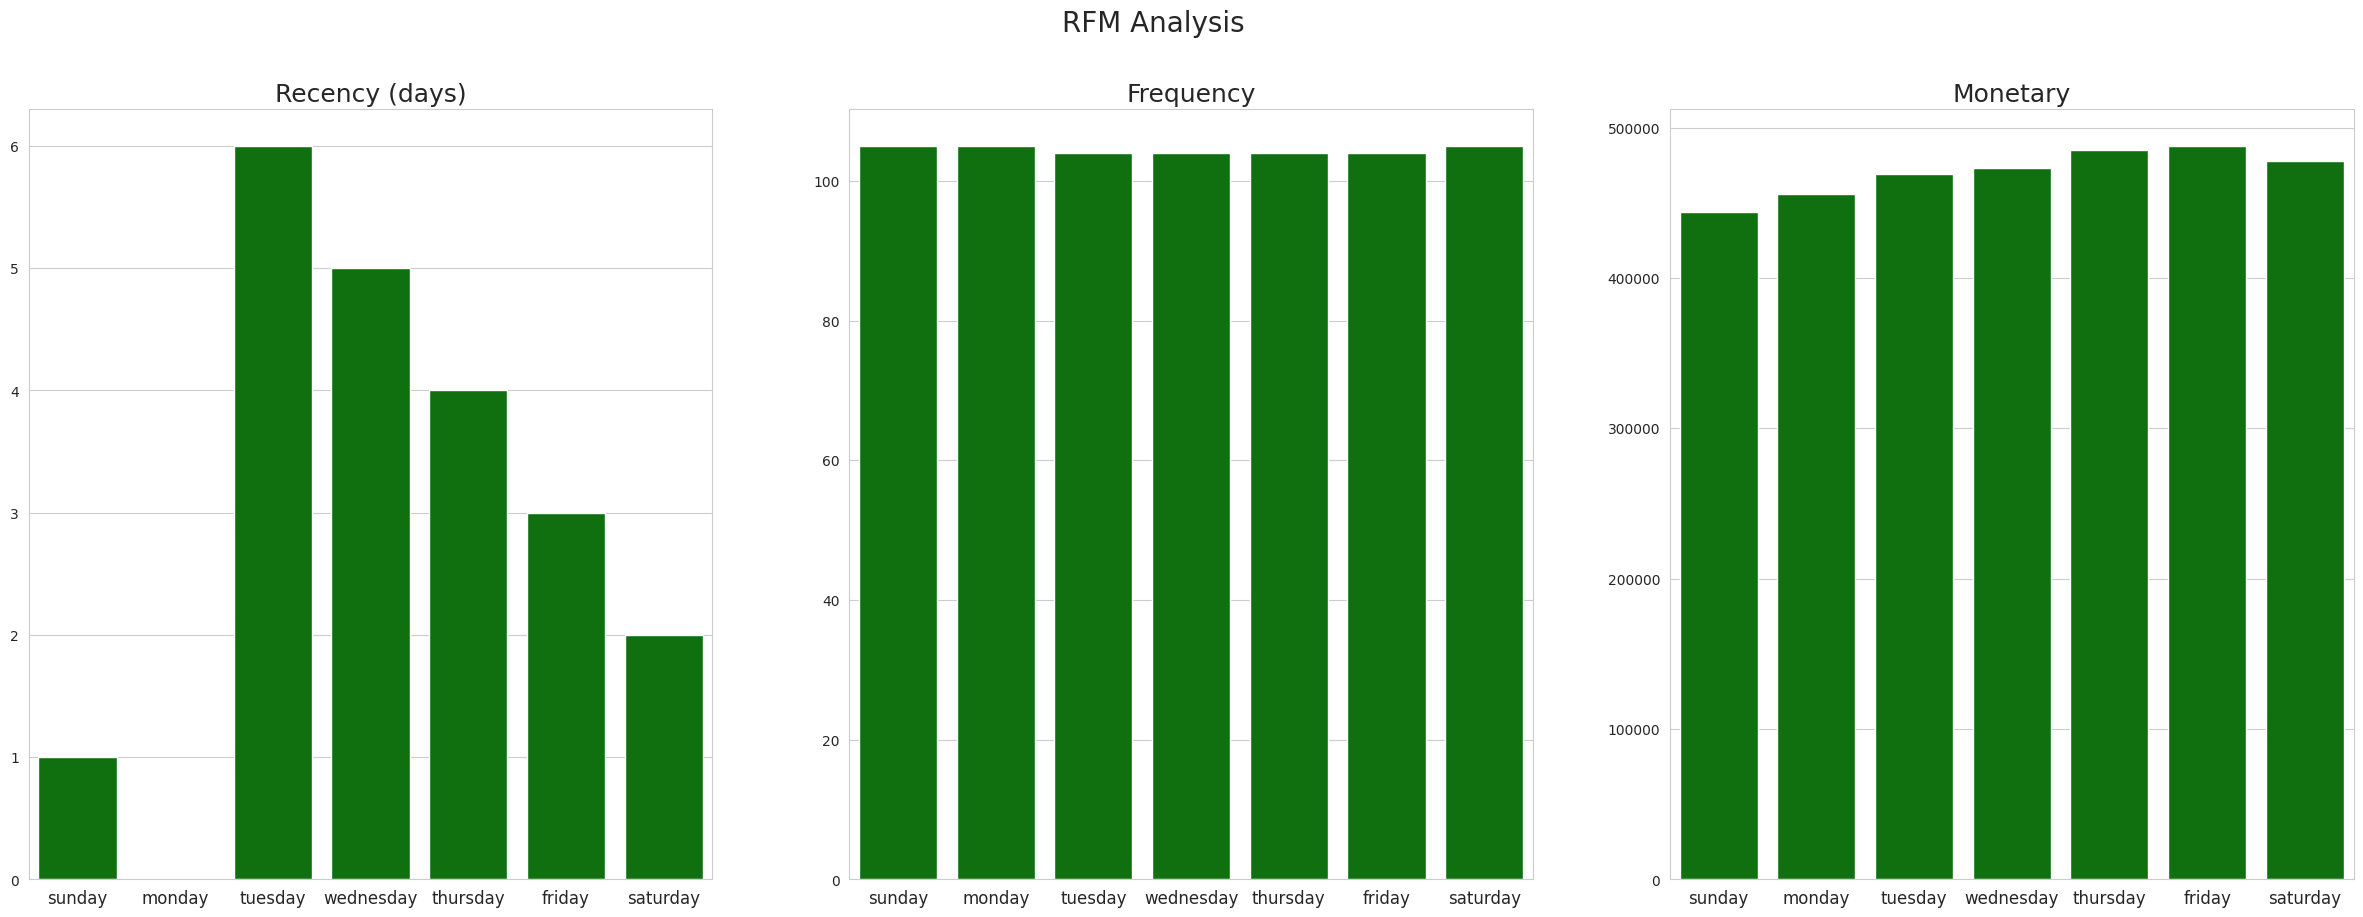

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True), color='green', ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=True), color='green', ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12)

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=True), color='green', ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("RFM Analysis", fontsize=20)
plt.show()

### Pertanyaan 1:

In [34]:
bike_df[["hr","yr","mnth","holiday","weekday","workingday","cnt"]].corr()

,hr,yr,mnth,holiday,weekday,workingday,cnt
hr,1.000000,-0.003867,-0.005772,0.000479,-0.003498,0.002285,0.394071
yr,-0.003867,1.000000,-0.010473,0.006692,-0.004485,-0.002196,0.250495
mnth,-0.005772,-0.010473,1.000000,0.018430,0.010400,-0.003477,0.120638
holiday,0.000479,0.006692,0.018430,1.000000,-0.102088,-0.252471,-0.030927
weekday,-0.003498,-0.004485,0.010400,-0.102088,1.000000,0.035955,0.026900
workingday,0.002285,-0.002196,-0.003477,-0.252471,0.035955,1.000000,0.030284
cnt,0.394071,0.250495,0.120638,-0.030927,0.026900,0.030284,1.000000


### Pertanyaan 2:

In [35]:
bike_df[["temp","atemp","hum","windspeed","season", "weathersit","cnt"]].corr()

,temp,atemp,hum,windspeed,season,weathersit,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.312025,-0.102640,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.319380,-0.105563,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,0.150625,0.418130,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,-0.149773,0.026226,0.093234
season,0.312025,0.319380,0.150625,-0.149773,1.000000,-0.014524,0.178056
weathersit,-0.102640,-0.105563,0.418130,0.026226,-0.014524,1.000000,-0.142426
cnt,0.404772,0.400929,-0.322911,0.093234,0.178056,-0.142426,1.000000


## Conclusion

- Conclution pertanyaan 1


1. Permintaan sewa sepeda pada hari kerja lebih tinggi daripada hari libur dengan perbedaan yang sangat signifikan.
2. Pada Hari Kerja (Senin hingga Jumat), jam-jam puncak dimulai dari jam 5 pagi hingga 9 pagi dan jam 17 (5 sore) hingga 21 (9 malam), sebaliknya pada Akhir Pekan (Sabtu dan Minggu), jam-jam puncak mulai dari jam 9 pagi hingga 16 (4 sore).
3. Saat bulan Juni hingga September mengalami kenaikan permintaan sewa sepeda pada titik tertinggi dan stabil, sedangkan pada bulan Desember sampai Februari mengalami penurunan yang cukup signifikan.
---



- conclution pertanyaan 2

1. Cuaca yang cerah membuat permintaan sewa sepeda menjadi lebih tinggi, sebaliknya pada saat terjadi badai salju dan hujan lebat permintaan sewa menjadi sangat rendah.
2. Pada musim gugur permintaan sewa sepeda meningkat, sedangkan pada musim semi permintaan sewa sepeda berkurang.
3. Saat suhu / temperatur rendah dan kelembaban udara tinggi, permintaan sewa sepeda menurun.

---



In [36]:
bike_df.to_csv("bike_data.csv", index=False)

In [37]:
rfm_df.to_csv("rfm.csv", index=False)